<a href="https://colab.research.google.com/github/Yin-Tzu/predict_DA_reaction_product2/blob/main/4prediction_of_product_of_DA_reaction/3rd_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

與雲端連接

In [ ]:
# 下載 file_id 為 "1duQU7xqXRsOSPYeOR0zLiSA8g_LCFzoV" 的檔案，並將它命名為 Minori.jpg
!gdown --id '1Ca88p0QKYfIUw7DBloS9M2mJowe5sZVO' 
!gdown --id '1DnRk30Cjpec3qhDMPDYa-AQbFKVxPqd2'
!gdown --id '1lKwCPW4EAOrUQ9OdfkaSP6yvuMQTqRuM'
!gdown --id '1LK9zx8XUL7u1KQSQrY5XdeYAuGPx8m1o'
# 列出目前目錄下所有的檔案
!ls

Downloading...
From: https://drive.google.com/uc?id=1Ca88p0QKYfIUw7DBloS9M2mJowe5sZVO
To: /content/X_train.npy
76.8MB [00:00, 83.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DnRk30Cjpec3qhDMPDYa-AQbFKVxPqd2
To: /content/X_test.npy
19.2MB [00:00, 41.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lKwCPW4EAOrUQ9OdfkaSP6yvuMQTqRuM
To: /content/y_train.npy
100% 640k/640k [00:00<00:00, 10.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LK9zx8XUL7u1KQSQrY5XdeYAuGPx8m1o
To: /content/y_test.npy
100% 160k/160k [00:00<00:00, 5.15MB/s]
sample_data  X_test.npy  X_train.npy  y_test.npy  y_train.npy


In [ ]:
import zipfile
file_dir = './3，3，3，300000.zip'
zipFile = zipfile.ZipFile(file_dir)
for file in zipFile.namelist():
    zipFile.extract(file, '/content')  # 解压路径
zipFile.close()

訓練模型

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import cv2
import copy
from tensorflow.keras import regularizers


tStart = time.time()#計時開始
"""
datafile1 = u'./drive/My Drive/X_train.npy'
datafile2 = u'./drive/My Drive/y_train.npy'
datafile3 = u'./drive/My Drive/X_test.npy'
datafile4 = u'./drive/My Drive/y_test.npy'
"""
datafile1 = u'./X_train.npy'
datafile2 = u'./y_train.npy'
datafile3 = u'./X_test.npy'
datafile4 = u'./y_test.npy'
X_train_image,y_train_label,X_test_image,y_test_label = np.load(datafile1), np.load(datafile2), np.load(datafile3), np.load(datafile4)
"""
datafile5 = u'./x_tt.npy'
datafile6 = u'./y_tt.npy'
x_tt,y_tt=np.load(datafile5), np.load(datafile6)
"""

#print(x_tt.shape, y_ttOneHot.shape)

print(X_train_image.shape,y_train_label.shape,X_test_image.shape,y_test_label.shape)
one = np.where(y_train_label == 1)
one = copy.deepcopy(one[0])
print(len(one))

p = np.where(y_train_label == 0)
p = copy.deepcopy(p[0])
print(len(p))

on = np.where(y_test_label == 1)
on = copy.deepcopy(on[0])
print(len(on))

n = np.where(y_test_label == 0)
n = copy.deepcopy(n[0])
print(len(n))


# validation
datafile5 = u'./X_valid.npy'
datafile6 = u'./y_valid.npy'
X_valid_image,y_valid_label = np.load(datafile5), np.load(datafile6)

#X_train_image,y_train_label,X_test_image,y_test_label = X_train,y_train , X_test, y_test
#print(X_train_image.shape,y_train_label.shape,X_test_image.shape,y_test_label.shape)



print(X_valid_image.shape)
X_valid = X_valid_image.astype('float32')

#X_valid = X_valid_image.reshape(-1, 128, 128, 3).astype('float32')
y_ValidOneHot = tf.keras.utils.to_categorical(y_valid_label)
print(y_ValidOneHot.dtype)

X_train = X_train_image.reshape(-1, 20, 2, 3).astype('float32')
X_test = X_test_image.reshape(-1, 20, 2, 3).astype('float32')
y_TrainOneHot = tf.keras.utils.to_categorical(y_train_label)  # One-Hot编码
y_TestOneHot = tf.keras.utils.to_categorical(y_test_label)  # https://keras.io/api/utils/python_utils/#to_categorical-function
#y_ttOneHot = tf.keras.utils.to_categorical(y_tt, num_classes=2)
print(y_TrainOneHot.dtype)
print(y_test_label)
print(y_TestOneHot)
#print(y_tt)
#print(y_ttOneHot)

from sklearn.externals import joblib
#joblib.dump(b, 'eig1')

model = tf.keras.models.Sequential()  # 调用Sequential模型
model.add(layers.Conv2D(input_shape=(20, 2, 3), filters=240, kernel_size=(5,1), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv1',kernel_regularizer=regularizers.l2(0.001)))  # 10*10
model.add(layers.MaxPool2D(pool_size=(3,3), strides=2, padding='same', name='pool1'))  # 5*5
model.add(layers.Conv2D(filters=480, kernel_size=(3,3), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv2',kernel_regularizer=regularizers.l2(0.001)))  # 10*10
model.add(layers.MaxPool2D(pool_size=(3,3), strides=2, padding='same', name='pool2'))
model.add(layers.Conv2D(filters=480, kernel_size=(3,3), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv3',kernel_regularizer=regularizers.l2(0.001)))  # 10*10
model.add(layers.MaxPool2D(pool_size=(3,3), strides=2, padding='same', name='pool3'))
model.add(layers.Conv2D(filters=96, kernel_size=(3,3), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv5'))  # 10*10
model.add(layers.MaxPool2D(pool_size=(3,3), strides=2, padding='same', name='pool5'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(units=384 , kernel_initializer='TruncatedNormal', activation='relu'))
model.add(layers.Dropout(0.2))  #在 0 和 1 之间浮动。需要丢弃的输入比例。
model.add(layers.Dense(units=2,kernel_initializer='TruncatedNormal', activation='softmax'))#,input_dim=100

print(model.summary())

# 模型的训练 编译模型
opt = tf.keras.optimizers.Adam(learning_rate=0.00041268)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  # metrics是训练和测试期间的模型评估标准。

# 监控val_loss，当连续40轮变化小于0.0001时启动early stopping
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40, min_delta=0.0001)

# 训练模型
train_history = model.fit(x=X_train, y=y_TrainOneHot, validation_data=(X_valid, y_ValidOneHot), epochs=30, batch_size=70, verbose=2)  # validation_split=0.25,validation_data=(X_valid, y_ValidOneHot), callbacks=[es])#, callbacks=[tensorboard_callback])  # verbose日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
# 查看训练过程，之前的训练步骤的值都保存在这里面。这里共有loss,accuracy,val_loss,val_accuracy四个参数
print(train_history.history)

# 將模型儲存至 HDF5 檔案中
model.save('NN_3_1.h5')  # creates a HDF5 file 'my_model.h5'

scores = model.evaluate(X_test,y_TestOneHot)
print('loss, accuracy=',scores) #显示测试准确率[1]

prediction = model.predict_classes(X_test)
# 返回预测属于某标签的概率
y_score = model.predict_proba(X_test)
#print(y_score)


tEnd = time.time()#計時結束
#列印結果
print("It cost %f sec" % (tEnd - tStart))  #會自動做近位
print(tEnd - tStart)  #原型長這樣
pyyuj = 1
#scores = model.evaluate(x_tt,y_ttOneHot)
#print('loss, accuracy=',scores) #显示测试准确率[1]

prediction = model.predict_classes(X_test)
# 返回预测属于某标签的概率
y_score = model.predict_proba(X_test)
#print(y_score)


tEnd = time.time()#計時結束
#列印結果
print("It cost %f sec" % (tEnd - tStart))  #會自動做近位
print(tEnd - tStart)  #原型長這樣

def show_train_history(train_history, train, validation):  # 訓練集驗證準確度對epoch做圖
    plt.plot(train_history.history[train])  # 绘制训练数据的执行结果
    plt.plot(train_history.history[validation])  # 绘制验证数据的执行结果
    plt.title('Train History')  # 图标题
    plt.xlabel('epoch')  # x轴标签
    plt.ylabel(train)  # y轴标签
    plt.legend(['train', 'validation'], loc='upper left')  # 添加左上角图例
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')

show_train_history(train_history, 'loss', 'val_loss')

print(pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict']))   # https://zhuanlan.zhihu.com/p/52368125  其他呈現交叉表方法(平均、彩色圖...)



(180000, 20, 2, 3) (180000,) (60000, 20, 2, 3) (60000,)
26436
153564
8814
51186
(60000, 20, 2, 3)
float32
float32
[1 1 1 ... 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 20, 2, 240)        3840      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 10, 1, 240)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 1, 480)        1037280   
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 1, 480)         0         
_________________________________________________________________
conv3 (Conv2D)               (None, 5, 1, 480)         2074080   
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 3, 1, 480)         0         
_________________________________________________________________
conv5 (Conv2D)               (None, 3, 1, 96)          4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: ignored

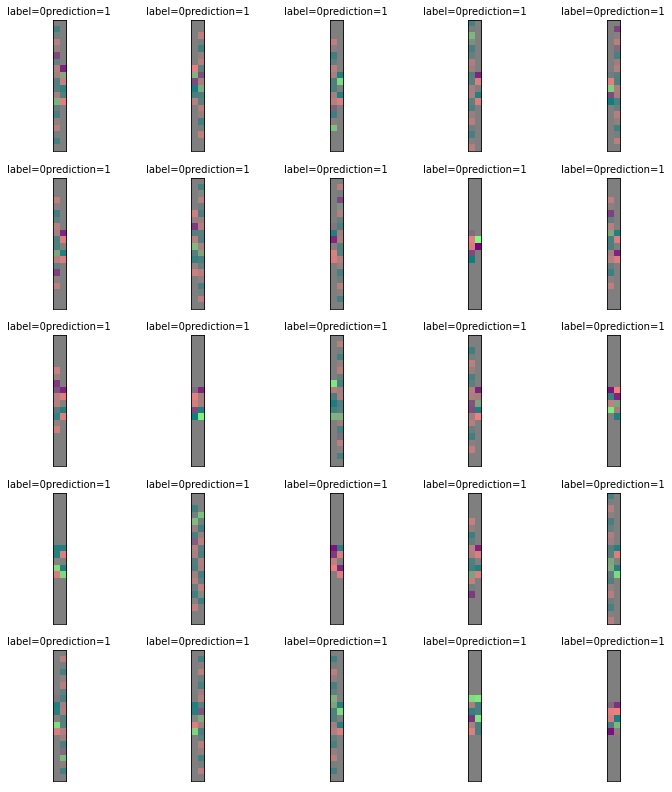

In [ ]:
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
prediction = model.predict_classes(X_test)
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
j=0
for i in df[(df.label==0)&(df.predict==1)].index:
    fig = plt.gcf()
    fig.set_size_inches(12, 14)  # 设置图表大小
    nums = len(df[(df.label==0)&(df.predict==1)].index)
    ax = plt.subplot(5, 5, 1 + j)  # 子图生成
    MiMaScaler = preprocessing.MinMaxScaler(feature_range=(0, 255))#
    nsamples, nx, ny, d = X_test_image.shape
    n = X_test_image.reshape((nsamples*nx*ny*d, 1))
    MiMaScaler.fit(n)
    v=MiMaScaler.transform(n)
    X_test_image = v.reshape((nsamples,nx, ny, d))
    img = Image.fromarray(np.uint8(X_test_image[i]))
    ax.imshow(img)  # idx是为了方便索引所要查询的图像, cmap='binary'
    title = 'label=' + str(y_test_label[i])  # 定义title方便图像结果对应
    if (len(prediction) > 0):  # 如果有预测图像，则显示预测结果
        title += 'prediction=' + str(prediction[i])
    ax.set_title(title, fontsize=10)  # 设置图像title
    ax.set_xticks([])  # 无x刻度
    ax.set_yticks([])  # 无y刻度
    j+=1
plt.show()

j=0
for i in df[(df.label==1)&(df.predict==0)].index:
    print(X_test_image[i])
    #print(i)
    fig = plt.gcf()
    fig.set_size_inches(12, 14)  # 设置图表大小
    nums = len(df[(df.label==0)&(df.predict==1)].index)
    ax = plt.subplot(5, 5, 1 + j)  # 子图生成
    #if (1 + j)==20:
    #  print(X_test_image[i])
    MiMaScaler = preprocessing.MinMaxScaler(feature_range=(0, 255))#
    nsamples, nx, ny, d = X_test_image.shape
    n = X_test_image.reshape((nsamples*nx*ny*d, 1))
    MiMaScaler.fit(n)
    v=MiMaScaler.transform(n)
    X_test_image = v.reshape((nsamples,nx, ny, d))
    img = Image.fromarray(np.uint8(X_test_image[i]))
    ax.imshow(img)  # idx是为了方便索引所要查询的图像, cmap='binary'
    title = 'label=' + str(y_test_label[i])  # 定义title方便图像结果对应
    if (len(prediction) > 0):  # 如果有预测图像，则显示预测结果
        title += 'prediction=' + str(prediction[i])
    ax.set_title(title, fontsize=10)  # 设置图像title
    ax.set_xticks([])  # 无x刻度
    ax.set_yticks([])  # 无y刻度
    j+=1
plt.show()

看權重及特徵圖

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from PIL import Image

filters, biases = model.layers[0].get_weights()  # 得到該層的權重和偏差
#print(filters, biases)
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters = 16
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    #ax = plt.subplot(3, 6, (i+1))
    plt.xticks(())
    plt.yticks(())
    # plot filter channel in grayscale
    plt.imshow(f)#, cmap='gray'
    #outdir = u'D:/New/CNN_Huckel/in_CNN/20200612/'
    name1 = str(601)+'/f1/' + str(i) + '.jpg'
    #plt.savefig(outdir + name1)
    #plt.clf()
    # show the figure
    plt.show()
    plt.clf()


test2 = X_test[2][np.newaxis, :]
prediction = model.predict_classes(test2)
print(prediction)
test1 = X_test[1][np.newaxis, :]
yy = y_test_label.tolist()
test3 = X_test[yy.index(1)][np.newaxis, :]



def feature_map(layers, name, m, test = test2, aa=4,b=4, full=None):
    model1 = Model(inputs=model.inputs, outputs=model.layers[layers].output)
    model1.summary()
    feature_maps = model1.predict(test)
    f_min, f_max = feature_maps.min(), feature_maps.max()
    feature_maps = (feature_maps - f_min) / (f_max - f_min)
    ix = 1
    for _ in range(aa):
        for _ in range(b):
            if full is True:
                ax = plt.subplot(aa, b, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                a = feature_maps[0, ix - 1]
                a = np.array([[a]])
                plt.imshow(a, cmap='gray', vmin=0, vmax=1)
            else:
                #plt.imshow(feature_maps[0, :, :, (ix - 1)])  #, cmap='gray'
                # cv.imwrite(u'D:/New/CNN_Huckel/in_CNN/20200609/pool1' + str(ix-1) + '.jpg', feature_maps[0, :, :, (ix-1)])
                plt.imshow(feature_maps[0, :, :, (ix - 1)], cmap='gray')  #, cmap='binary'
                plt.xticks(())
                plt.yticks(())
                plt.show()
            #outdir = u'D:/New/CNN_Huckel/in_CNN/20200612/'
            name1 = str(m)+'/'+name+'/'+str(ix)+'.jpg'
            #plt.savefig(outdir + name1)
            ix += 1
    plt.show()
    plt.clf()



feature_map(0, test = test2, aa=1, b=16, name = 'conv1', m=602)  #捲積層1
feature_map(0, test = test3, aa=1, b=16, name = 'conv1', m=602)  #捲積層1
feature_map(1, test = test3, aa=1, b=16, name = 'conv1', m=602)  #捲積層1

test1_1 = X_test[yy.index(1)].reshape(20,2,3)
print(test1_1)
t_min, t_max = test1_1.min(), test1_1.max()
test1_1 = (test1_1 - t_min) / (t_max - t_min)
print(test1_1)
test1_1=test1_1*255
print(test1_1)
img = Image.fromarray(np.uint8(test1_1))#, mode='L'
plt.imshow(img, cmap='gray', vmin=0, vmax=255) # 顯示圖片
plt.axis('off') # 不顯示座標軸
plt.show()

In [ ]:
from google.colab import files
files.download("NN_3_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>